In [4]:
import os
from PIL import Image

classes = ['cherry', 'strawberry', 'tomato']
data_dir = './train_data'

data = {}

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    images = []
    
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.jpg')): 
            file_path = os.path.join(class_dir, file_name)
            
            img = Image.open(file_path)
            images.append(img)
    
    data[class_name] = images

print(f'Loaded {len(data["cherry"])} images from cherry class.')
print(f'Loaded {len(data["strawberry"])} images from strawberry class.')
print(f'Loaded {len(data["tomato"])} images from tomato class.')

Loaded 1495 images from cherry class.
Loaded 1495 images from strawberry class.
Loaded 1495 images from tomato class.


Most common image resolutions:
Resolution: (300, 300), Count: 4432
Resolution: (225, 225), Count: 18
Resolution: (275, 183), Count: 3
Resolution: (220, 229), Count: 2
Resolution: (201, 251), Count: 2


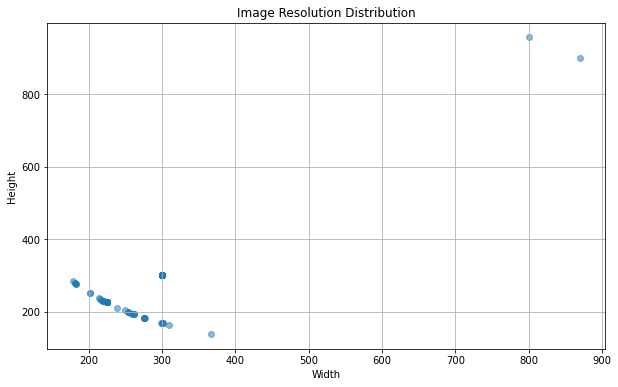

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

classes = ['cherry', 'strawberry', 'tomato']
data_dir = './train_data'

image_resolutions = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(class_dir, file_name)
            with Image.open(file_path) as img:
                resolution = img.size  # (width, height)
                image_resolutions.append(resolution)

resolution_count = Counter(image_resolutions)

print("Most common image resolutions:")
for res, count in resolution_count.most_common(5):
    print(f"Resolution: {res}, Count: {count}")

widths, heights = zip(*image_resolutions)

plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Resolution Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()


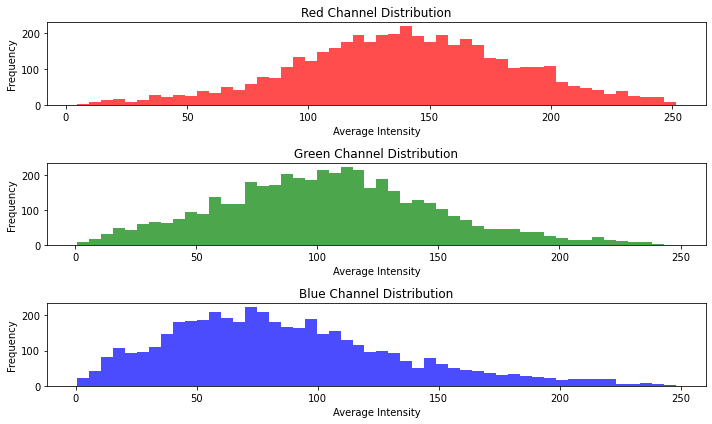

In [6]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

classes = ['cherry', 'strawberry', 'tomato']
data_dir = './train_data'

avg_r_values = []
avg_g_values = []
avg_b_values = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.jpg')):
            file_path = os.path.join(class_dir, file_name)
            with Image.open(file_path) as img:
                img = img.convert('RGB') 
                np_img = np.array(img) 
                
                avg_r = np.mean(np_img[:, :, 0])
                avg_g = np.mean(np_img[:, :, 1])
                avg_b = np.mean(np_img[:, :, 2])
                
                avg_r_values.append(avg_r)
                avg_g_values.append(avg_g)
                avg_b_values.append(avg_b)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.hist(avg_r_values, bins=50, color='red', alpha=0.7)
plt.title('Red Channel Distribution')
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(avg_g_values, bins=50, color='green', alpha=0.7)
plt.title('Green Channel Distribution')
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(avg_b_values, bins=50, color='blue', alpha=0.7)
plt.title('Blue Channel Distribution')
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
